In [1]:
import numpy
import sys
import numpy as np
import tensorflow as tf
import pickle
from tqdm import tqdm_notebook as tqm
from time import time
import math

import matplotlib.pyplot as plt

sys.path.append('..')

from linknet import LinkNetBatch
from dataset import Dataset, DatasetIndex
from plot_functions import plot_example_interactive, plot_examples

%matplotlib inline

In [2]:
! nvidia-smi

Wed Oct 11 09:44:38 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.26                 Driver Version: 375.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0     Off |                  N/A |
|  0%   41C    P8    14W / 200W |      0MiB /  8113MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:03:00.0     Off |                  N/A |
|  0%   41C    P8    15W / 200W |    317MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [3]:
IMAGE_SIZE = 64
MNIST_SIZE = 65000
BATCH_SIZE = 500
N_EPOCHS = 10
MAX_ITER = 100

In [4]:
ind = DatasetIndex(np.arange(MNIST_SIZE))
mnistset = Dataset(ind, batch_class=LinkNetBatch)
mnistset.cv_split([0.9, 0.1])

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [6]:
prediction = []
test_log = []
train_log = []

In [7]:
ppl = mnistset.train.pipeline()\
        .load()\
        .noise_and_mask()\
        .train(sess)\
        .get_stat(sess, train_log, True)
        
ppl_test = mnistset.test.pipeline()\
            .load()\
            .noise_and_mask()\

In [ ]:
start = time()
for i in range(MAX_ITER):
    ppl.next_batch(BATCH_SIZE, n_epochs=None)
    ppl_test.get_stat(sess, test_log, False).next_batch(100, n_epochs=None)
    if (i+1) % 1 == 0:
        print("Iter {}: Train loss: {}, test loss: {}".format(i+1, train_log[-1][0], test_log[-1][0]))
stop = time()
print("Train time: {} min".format((stop-start)/60))

Iter 1: Train loss: 0.1469142735004425, test loss: 0.14695057272911072
Iter 2: Train loss: 0.11813417077064514, test loss: 0.11891777813434601
Iter 3: Train loss: 0.11189179122447968, test loss: 0.11036872118711472
Iter 4: Train loss: 0.12250470370054245, test loss: 0.12200377136468887
Iter 5: Train loss: 0.14273791015148163, test loss: 0.14052750170230865
Iter 6: Train loss: 0.14759287238121033, test loss: 0.14465239644050598
Iter 7: Train loss: 0.1401948183774948, test loss: 0.13919857144355774
Iter 8: Train loss: 0.12966954708099365, test loss: 0.12857356667518616
Iter 9: Train loss: 0.12378361076116562, test loss: 0.12369325011968613
Iter 10: Train loss: 0.12183193117380142, test loss: 0.12241683900356293
Iter 11: Train loss: 0.12164999544620514, test loss: 0.12167559564113617
Iter 12: Train loss: 0.12090954184532166, test loss: 0.12136216461658478
Iter 13: Train loss: 0.11808637529611588, test loss: 0.11939098685979843
Iter 14: Train loss: 0.11450246721506119, test loss: 0.1149232

In [15]:
test_loss, test_iou = list(zip(*test_log))
train_loss, train_iou = list(zip(*train_log))
test_iou = list(zip(*test_iou))[0]
train_iou = list(zip(*train_iou))[0]

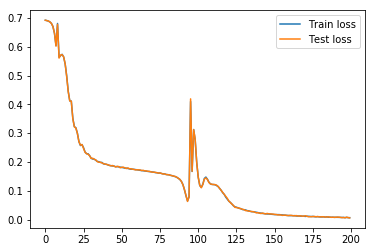

In [16]:
plt1, = plt.plot(train_loss,  label='Train loss')
plt2, = plt.plot(test_loss, label='Test loss')
plt.legend(handles=[plt1, plt2])
plt.show()

In [17]:
prediction = []
ppl_test.predict_proba(sess, prediction).next_batch(10, n_epochs=None)

In [18]:
with open('predictions.pkl', 'wb') as output:
    pickle.dump(prediction, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
plot_examples(prediction)